#Example re-analysis of HAI (hemagglutination inhibition) data from one influenza vaccination study (SDY212) from ImmPort
#Using IPython, IPython Notebook and Pandas

##What is ImmPort ?

The Immunology Database and Analysis Portal (ImmPort) project provides tools and services for the collection, QC, curation, and sharing of immunological data. The purpose of ImmPort is to provide a long term, sustainable source for promoting the re-use of these data provided by NIAID DAIT and DMID funded investigators.

Study packages can be downloaded for free from ImmPort, but you must first register for an account. Study download packages are available in several formats, for the purpose of this tutorial we will be using the Tab version, which contain the data in text files using the "tab" as the column separator. Another popular format is the MySQL format, which can be used to populate a MySQL database.

Details on the tables are available at this link. [Table Definitions](http://immport.org/immport-open/public/schema/schemaDefinition/study).

##SDY122

[SDY212](http://immport.org/immport-open/public/study/study/displayStudyDetail/SDY212) chosen for this tutorial is one of 118 studies currently available for download, and we will focus on the HAI results for this tutorial.

<strong>Title:</strong>Apoptosis and other immune biomarkers predict influenza vaccine (TIV 2008) responsiveness

<strong>Principal Investigator:</strong> Mark M. Davis  

<strong>Description:</strong>In an effort to indentify benchmarks of immunological health, influenza vaccination was used in 30 young (20 to 30 years) and 59 older subjects (60 to 89 years) as models for strong and weak immune responses, respectively. 

##Learn more about [IPython Notebook](http://ipython.org/notebook.html), [MatplotLib](http://matplotlib.org/) and [Pandas](http://pandas.pydata.org/)
The IPython notebook can be used for data analysis and as a teaching tool. Below are links to a talk by D.I. Ketcheson and A. Ahmadia, titled *Teaching Numerical Methods with IPython Notebooks* at the 2014 SciPy conference. Videos are available at YouTube: [Part 1](https://www.youtube.com/watch?v=L-caFdJMR9E) [Part 2](https://www.youtube.com/watch?v=cm0oVqbxssU) [Part 3](https://www.youtube.com/watch?v=rpGghGDEkZE)

Another very good tutorial on data analysis with IPython Notebook and Pandas by Chris Fonnesbeck, titled *Statistcial Data Analysis in Python* at the 2013 SciPy conference. Videos are available at YouTube: [Part 1](https://www.youtube.com/watch?v=DXPwSiRTxYY) [Part 2](https://www.youtube.com/watch?v=TGEBpzJUxdI) [Part 3](https://www.youtube.com/watch?v=YZDtBEEZuAk) [Part 4](https://www.youtube.com/watch?v=5_rcdhBXD-0). Chris Fonnesbeck has another tutorial on *Bayesian Statistical Analysis* from the SciPy 2014 conference, that is also available at YouTube.

For the machine learning fans, there is a tutorial by Jake Vanderplas and Olivier Grisel, titled *Exploring Machine Learning with Scikit-learn* from the PyCon 2014 conference available at YouTube: [Part 1](https://www.youtube.com/watch?v=HjAB45qsx_c)

#Start Tutorial
##Load in the Python libraries used for this analysis

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Set some Pandas options
pd.set_option('html',False)

##Explore the Overall Study Design and Subject Characteristics

In this section you will be introduced to some of the content that is available for download from ImmPort, that can be used to perform a re-analysis of the study. This section demonstrates loading in the information from TSV files, merging the contents and performing simple descriptive statistics.

- subjects.txt - general subject demographic information.
- arm_2_subject.txt - mapping from subjects to study arms/cohorts.
- arm_or_cohort - study arm names and descriptions

In [2]:
subjects = pd.read_table("./Data/SDY212/Tab/subject.txt",sep="\t")
arm_2_subject = pd.read_table("./Data/SDY212/Tab/arm_2_subject.txt",sep="\t")
arm_or_cohort = pd.read_table("./Data/SDY212/Tab/arm_or_cohort.txt",sep="\t")

##Review the contents of these files

In the first section print out the column names for each file loaded. The first dimension reported by **shape** is the number of rows and the second dimension is the number of columns. Because the number of rows reported for the **subjects** and **arms_2_subject** files match, this indicates the data has a mapping from a subject to a study arm.

In [3]:
subjects.columns

Index([u'SUBJECT_ACCESSION', u'ANCESTRAL_POPULATION', u'DESCRIPTION',
       u'ETHNICITY', u'GENDER', u'RACE', u'RACE_SPECIFY', u'SPECIES',
       u'STRAIN', u'STRAIN_CHARACTERISTICS', u'WORKSPACE_ID'],
      dtype='object')

In [4]:
arm_2_subject.columns

Index([u'ARM_ACCESSION', u'SUBJECT_ACCESSION', u'AGE_EVENT',
       u'AGE_EVENT_SPECIFY', u'AGE_UNIT', u'MAX_SUBJECT_AGE',
       u'MIN_SUBJECT_AGE', u'SUBJECT_PHENOTYPE'],
      dtype='object')

In [5]:
arm_or_cohort.columns

Index([u'ARM_ACCESSION', u'DESCRIPTION', u'NAME', u'STUDY_ACCESSION', u'TYPE',
       u'WORKSPACE_ID'],
      dtype='object')

In [6]:
subjects.shape

(91, 11)

In [7]:
arm_2_subject.shape

(91, 8)

In [8]:
arm_or_cohort.shape

(2, 6)

##Review the content by looking at the first row for each file.

In [9]:
subjects.ix[0]

SUBJECT_ACCESSION                                                 SUB134268
ANCESTRAL_POPULATION                                                    NaN
DESCRIPTION               This subject record was used to consolidate du...
ETHNICITY                                            Not Hispanic or Latino
GENDER                                                               Female
RACE                                                                  White
RACE_SPECIFY                                                            NaN
SPECIES                                                        Homo sapiens
STRAIN                                                                  NaN
STRAIN_CHARACTERISTICS                                                  NaN
WORKSPACE_ID                                                           2883
Name: 0, dtype: object

In [10]:
arm_2_subject.ix[0]

ARM_ACCESSION                    ARM894
SUBJECT_ACCESSION             SUB134323
AGE_EVENT            Age at Study Day 0
AGE_EVENT_SPECIFY                   NaN
AGE_UNIT                          Years
MAX_SUBJECT_AGE                   23.82
MIN_SUBJECT_AGE                   23.82
SUBJECT_PHENOTYPE              Non-twin
Name: 0, dtype: object

In [11]:
arm_or_cohort[['ARM_ACCESSION','NAME','DESCRIPTION']]

  ARM_ACCESSION      NAME                                        DESCRIPTION
0        ARM895  Cohort_2  Older participants aged 60 to 89 years, vaccin...
1        ARM894  Cohort_1  Young participants aged 20 to 30 years, vaccin...

##Rename the cohort names to something more meaningful.

In [12]:
arm_or_cohort['ARM_NAME'] = ['Old','Young']

In [13]:
arm_or_cohort[['ARM_ACCESSION','ARM_NAME','DESCRIPTION']]

  ARM_ACCESSION ARM_NAME                                        DESCRIPTION
0        ARM895      Old  Older participants aged 60 to 89 years, vaccin...
1        ARM894    Young  Young participants aged 20 to 30 years, vaccin...

##Merge the subject, arm_2_subjects and arm_or_cohort information into one table

We can merge the information from thes 3 tables into one Data Frame because the first 2 tables both contain the SUBJECT_ACCESSION column. The last 2 tables contain the ARM_ACCESSION column. After the merge, we will also drop columns not needed at this time for futher analysis.

In [14]:
subjects_merged = pd.merge(subjects,arm_2_subject,left_on='SUBJECT_ACCESSION',right_on='SUBJECT_ACCESSION')
subjects_merged = pd.merge(subjects_merged,arm_or_cohort,left_on='ARM_ACCESSION',right_on='ARM_ACCESSION')
subjects_merged.ix[0]

SUBJECT_ACCESSION                                                 SUB134268
ANCESTRAL_POPULATION                                                    NaN
DESCRIPTION_x             This subject record was used to consolidate du...
ETHNICITY                                            Not Hispanic or Latino
GENDER                                                               Female
RACE                                                                  White
RACE_SPECIFY                                                            NaN
SPECIES                                                        Homo sapiens
STRAIN                                                                  NaN
STRAIN_CHARACTERISTICS                                                  NaN
WORKSPACE_ID_x                                                         2883
ARM_ACCESSION                                                        ARM894
AGE_EVENT                                                Age at Study Day 0
AGE_EVENT_SP

##Drop columns not needed for this analysis.

In [15]:
subjects_merged = subjects_merged[['SUBJECT_ACCESSION','ARM_ACCESSION','ARM_NAME','GENDER','RACE','MIN_SUBJECT_AGE']]
subjects_merged.shape

(91, 6)

In [16]:
subjects_merged.ix[0]

SUBJECT_ACCESSION    SUB134268
ARM_ACCESSION           ARM894
ARM_NAME                 Young
GENDER                  Female
RACE                     White
MIN_SUBJECT_AGE          29.71
Name: 0, dtype: object

#Simple descriptive statistics and charts of the study subjects

Below we show some descriptive statistics and some simple plots of the data, just to get a feel for the distribution of age, gender and race. More formal plots can be be produced using the Matplotlib graphing library, which is used by Panda's for these basic plots. Note: The subjects in this set contain 2 subjects that do not have HAI results.

##Descriptive Statistics

In [17]:
subjects_merged.groupby('ARM_NAME').count()['SUBJECT_ACCESSION']

ARM_NAME
Old      61
Young    30
Name: SUBJECT_ACCESSION, dtype: int64

In [18]:
subjects_merged.groupby('GENDER').count()['SUBJECT_ACCESSION']

GENDER
Female    54
Male      37
Name: SUBJECT_ACCESSION, dtype: int64

In [19]:
subjects_merged.groupby('RACE').count()['SUBJECT_ACCESSION']

RACE
American Indian or Alaska Native     1
Asian                                8
Other                                7
White                               75
Name: SUBJECT_ACCESSION, dtype: int64

In [20]:
subjects_by_arm = subjects_merged.groupby('ARM_NAME')
subjects_by_arm.describe()

                MIN_SUBJECT_AGE
ARM_NAME                       
Old      count        61.000000
         mean         77.151803
         std           9.558915
         min          61.200000
         25%          68.080000
         50%          78.750000
         75%          85.170000
         max          90.000000
Young    count        30.000000
         mean         25.403000
         std           2.670702
         min          20.680000
         25%          23.882500
         50%          25.050000
         75%          27.115000
         max          30.750000

#Chart Descriptive Statistics
##Set style to ggplot

The rand_jiiter function is used seperate the dots on the plots, similar to the "jitter" functionality in the "R" "ggplot2" package. Use of jitter may be discouraged by some statisticians.

In the first set of plots we will be using the plotting functionality in the Pandas package, which uses matplotlib, but for most of the plots we will be using matplotlib directly.

In [21]:
plt.style.use('ggplot')
def rand_jitter(arr):
    stdev = .001*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def rand_jitter_log(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

##Count of Subjects by Arm and Gender

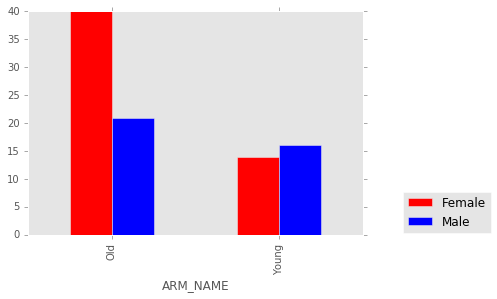

In [22]:
arm_counts = pd.crosstab(subjects_merged.ARM_NAME,subjects_merged.GENDER)
ax2 = arm_counts.plot(kind='bar', color=['red','blue'],grid=False,legend=False)
ax2.legend(loc="right",bbox_to_anchor=(1.4,0.1))

##Count of Subjects Arm and Race

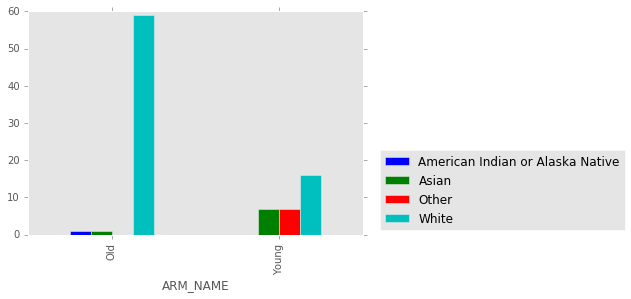

In [23]:
arm_counts = pd.crosstab(subjects_merged.ARM_NAME,subjects_merged.RACE)
ax2 = arm_counts.plot(kind='bar',grid=False,legend=False)
ax2.legend(loc="right",bbox_to_anchor=(1.8,0.2))

##Prepare data for analysis

In [24]:
subjects_old_female = subjects_merged[(subjects_merged['ARM_NAME']=="Old") & (subjects_merged['GENDER']=="Female")]
subjects_old_male = subjects_merged[(subjects_merged['ARM_NAME']=="Old") & (subjects_merged['GENDER']=="Male")]
subjects_young_female = subjects_merged[(subjects_merged['ARM_NAME']=="Young") & (subjects_merged['GENDER']=="Female")]
subjects_young_male = subjects_merged[(subjects_merged['ARM_NAME']=="Young") & (subjects_merged['GENDER']=="Male")]


##Age at Enrollment by ARM and Gender

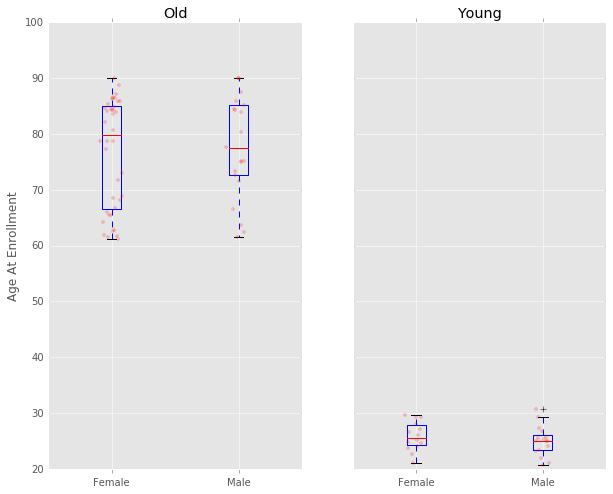

In [25]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,8),sharey=True)
data = [subjects_old_female.MIN_SUBJECT_AGE,subjects_old_male.MIN_SUBJECT_AGE]
ax1.boxplot(data)
ax1.set_xticklabels(['Female','Male'])
ax1.set_ylabel("Age At Enrollment")
ax1.tick_params(axis='y', direction='in',length=1)
ax1.set_title("Old")

# Plot the points, using rand_jitter
x = np.random.normal(1,.04,len(subjects_old_female.MIN_SUBJECT_AGE))
ax1.plot(x,rand_jitter(subjects_old_female.MIN_SUBJECT_AGE),'r.',alpha=0.2)
x = np.random.normal(2,.04,len(subjects_old_male.MIN_SUBJECT_AGE))
ax1.plot(x,rand_jitter(subjects_old_male.MIN_SUBJECT_AGE),'r.',alpha=0.2)

data = [subjects_young_female.MIN_SUBJECT_AGE,subjects_young_male.MIN_SUBJECT_AGE]
ax2.boxplot(data)
ax2.set_xticklabels(['Female','Male'])
ax2.tick_params(axis='y', direction='in',length=1)
ax2.set_title("Young")

# Plot the points, using rand_jitter
x = np.random.normal(1,.04,len(subjects_young_female.MIN_SUBJECT_AGE))
ax2.plot(x,rand_jitter(subjects_young_female.MIN_SUBJECT_AGE),'r.',alpha=0.2)
x = np.random.normal(2,.04,len(subjects_young_male.MIN_SUBJECT_AGE))
ax2.plot(x,rand_jitter(subjects_young_male.MIN_SUBJECT_AGE),'r.',alpha=0.2)

plt.show()

# Analyzing the HAI Results

##Read in the hai_result.txt data

In [26]:
hai_result = pd.read_table("./Data/SDY212/Tab/hai_result.txt",sep="\t")
hai_result.columns

Index([u'RESULT_ID', u'ARM_ACCESSION', u'BIOSAMPLE_ACCESSION', u'COMMENTS',
       u'EXPERIMENT_ACCESSION', u'EXPSAMPLE_ACCESSION', u'STUDY_ACCESSION',
       u'STUDY_TIME_COLLECTED', u'STUDY_TIME_COLLECTED_UNIT',
       u'SUBJECT_ACCESSION', u'UNIT_PREFERRED', u'UNIT_REPORTED',
       u'VALUE_PREFERRED', u'VALUE_REPORTED', u'VIRUS_STRAIN_PREFERRED',
       u'VIRUS_STRAIN_REPORTED', u'WORKSPACE_ID'],
      dtype='object')

In [27]:
hai_result.head()

   RESULT_ID ARM_ACCESSION BIOSAMPLE_ACCESSION  COMMENTS EXPERIMENT_ACCESSION  \
0       7026        ARM895            BS697116       NaN             EXP13382   
1       6588        ARM895            BS694690       NaN             EXP13382   
2       6710        ARM895            BS694651       NaN             EXP13382   
3       6763        ARM895            BS694682       NaN             EXP13382   
4       6939        ARM895            BS697087       NaN             EXP13382   

  EXPSAMPLE_ACCESSION STUDY_ACCESSION  STUDY_TIME_COLLECTED  \
0            ES760524          SDY212                    28   
1            ES742127          SDY212                     0   
2            ES742011          SDY212                     0   
3            ES742102          SDY212                     0   
4            ES760437          SDY212                    28   

  STUDY_TIME_COLLECTED_UNIT SUBJECT_ACCESSION  UNIT_PREFERRED  UNIT_REPORTED  \
0                      Days         SUB134316         

##Drop columns not necessary for analysis and merge in information from the subjects data frame

In [28]:
hai_result = hai_result[['ARM_ACCESSION','SUBJECT_ACCESSION','STUDY_TIME_COLLECTED','VALUE_PREFERRED','VIRUS_STRAIN_REPORTED']]
hai_result.head()

  ARM_ACCESSION SUBJECT_ACCESSION  STUDY_TIME_COLLECTED  VALUE_PREFERRED  \
0        ARM895         SUB134316                    28               80   
1        ARM895         SUB134280                     0               10   
2        ARM895         SUB134239                     0               40   
3        ARM895         SUB134272                     0               10   
4        ARM895         SUB134287                    28               80   

  VIRUS_STRAIN_REPORTED  
0                  H1N1  
1                     B  
2                  H3N2  
3                  H1N1  
4                  H1N1  

In [29]:
hai_result_merge = pd.merge(hai_result,subjects_merged,left_on='SUBJECT_ACCESSION',right_on='SUBJECT_ACCESSION')
hai_result_merge.head(10)

  ARM_ACCESSION_x SUBJECT_ACCESSION  STUDY_TIME_COLLECTED  VALUE_PREFERRED  \
0          ARM895         SUB134316                    28               80   
1          ARM895         SUB134316                     0               10   
2          ARM895         SUB134316                    28               10   
3          ARM895         SUB134316                    28               80   
4          ARM895         SUB134316                     0               20   
5          ARM895         SUB134316                     0               10   
6          ARM895         SUB134280                     0               10   
7          ARM895         SUB134280                     0               20   
8          ARM895         SUB134280                    28               20   
9          ARM895         SUB134280                    28              640   

  VIRUS_STRAIN_REPORTED ARM_ACCESSION_y ARM_NAME  GENDER   RACE  \
0                  H1N1          ARM895      Old  Female  White   
1      

##Identify the day 0 rows, remove extra columns, and rename VALUE_PREFERRED to Day0

In [30]:
study_day_0 = hai_result_merge[hai_result_merge['STUDY_TIME_COLLECTED'] == 0].copy()
study_day_0.drop(['ARM_ACCESSION_x','ARM_ACCESSION_y','STUDY_TIME_COLLECTED'],axis=1, inplace=True)
study_day_0.rename(columns={'VALUE_PREFERRED':'Day0'},inplace=True)
study_day_0.head(5)

  SUBJECT_ACCESSION  Day0 VIRUS_STRAIN_REPORTED ARM_NAME  GENDER   RACE  \
1         SUB134316    10                     B      Old  Female  White   
4         SUB134316    20                  H1N1      Old  Female  White   
5         SUB134316    10                  H3N2      Old  Female  White   
6         SUB134280    10                     B      Old  Female  White   
7         SUB134280    20                  H1N1      Old  Female  White   

   MIN_SUBJECT_AGE  
1            84.90  
4            84.90  
5            84.90  
6            77.27  
7            77.27  

##Identify the day 28 rows, remove extra columns, and rename VALUE_PREFERRED to Day28

In [31]:
study_day_28 = hai_result_merge[hai_result_merge['STUDY_TIME_COLLECTED'] == 28].copy()
study_day_28.drop(['ARM_ACCESSION_x','ARM_ACCESSION_y','STUDY_TIME_COLLECTED','GENDER','RACE','MIN_SUBJECT_AGE'],axis=1, inplace=True)
study_day_28.rename(columns={'VALUE_PREFERRED':'Day28'},inplace=True)
study_day_28.head(5)

  SUBJECT_ACCESSION  Day28 VIRUS_STRAIN_REPORTED ARM_NAME
0         SUB134316     80                  H1N1      Old
2         SUB134316     10                     B      Old
3         SUB134316     80                  H3N2      Old
8         SUB134280     20                  H1N1      Old
9         SUB134280    640                  H3N2      Old

In [32]:
study_day_0.shape

(267, 7)

In [33]:
study_day_28.shape

(267, 4)

##Merge the day 0 and day 28 content into one data frame

In [34]:
join_columns = ['SUBJECT_ACCESSION','ARM_NAME','VIRUS_STRAIN_REPORTED']
hai_analysis = pd.merge(study_day_0,study_day_28,left_on=join_columns,right_on=join_columns)
hai_analysis.head()

  SUBJECT_ACCESSION  Day0 VIRUS_STRAIN_REPORTED ARM_NAME  GENDER   RACE  \
0         SUB134316    10                     B      Old  Female  White   
1         SUB134316    20                  H1N1      Old  Female  White   
2         SUB134316    10                  H3N2      Old  Female  White   
3         SUB134280    10                     B      Old  Female  White   
4         SUB134280    20                  H1N1      Old  Female  White   

   MIN_SUBJECT_AGE  Day28  
0            84.90     10  
1            84.90     80  
2            84.90     80  
3            77.27     10  
4            77.27     20  

##Move Day0 right before Day28

Make the data a little easier to review.

In [35]:
day_0 = hai_analysis['Day0']
hai_analysis.drop(['Day0'],axis=1, inplace=True)
hai_analysis.insert(6,'Day0',day_0)
hai_analysis.head()
                

  SUBJECT_ACCESSION VIRUS_STRAIN_REPORTED ARM_NAME  GENDER   RACE  \
0         SUB134316                     B      Old  Female  White   
1         SUB134316                  H1N1      Old  Female  White   
2         SUB134316                  H3N2      Old  Female  White   
3         SUB134280                     B      Old  Female  White   
4         SUB134280                  H1N1      Old  Female  White   

   MIN_SUBJECT_AGE  Day0  Day28  
0            84.90    10     10  
1            84.90    20     80  
2            84.90    10     80  
3            77.27    10     10  
4            77.27    20     20  

##Calculate the fold change from day 0 to day 28, converting to log2 values to improve the display of level of change.

In [36]:
hai_analysis['FOLD_CHANGE'] = hai_analysis['Day28']/hai_analysis['Day0']
hai_analysis['FOLD_CHANGE_LOG2'] = np.log2(hai_analysis['FOLD_CHANGE'])
hai_analysis.head()

  SUBJECT_ACCESSION VIRUS_STRAIN_REPORTED ARM_NAME  GENDER   RACE  \
0         SUB134316                     B      Old  Female  White   
1         SUB134316                  H1N1      Old  Female  White   
2         SUB134316                  H3N2      Old  Female  White   
3         SUB134280                     B      Old  Female  White   
4         SUB134280                  H1N1      Old  Female  White   

   MIN_SUBJECT_AGE  Day0  Day28  FOLD_CHANGE  FOLD_CHANGE_LOG2  
0            84.90    10     10            1                 0  
1            84.90    20     80            4                 2  
2            84.90    10     80            8                 3  
3            77.27    10     10            1                 0  
4            77.27    20     20            1                 0  

##Review the data

In [37]:
#pd.set_option('display.max_rows', 500)
#hai_analysis[['SUBJECT_ACCESSION','ARM_NAME','VIRUS_STRAIN_REPORTED','Day0','Day28','FOLD_CHANGE','FOLD_CHANGE_LOG2']]

##Separate the data into groups for analysis

In [38]:
B_strain = hai_analysis[hai_analysis['VIRUS_STRAIN_REPORTED']=="B"]
B_strain_young = hai_analysis[(hai_analysis['VIRUS_STRAIN_REPORTED']=="B") & (hai_analysis['ARM_NAME']=="Young")]
B_strain_old = hai_analysis[(hai_analysis['VIRUS_STRAIN_REPORTED']=="B") & (hai_analysis['ARM_NAME']=="Old")]
H1N1_strain = hai_analysis[hai_analysis['VIRUS_STRAIN_REPORTED']=="H1N1"]
H1N1_strain_young = hai_analysis[(hai_analysis['VIRUS_STRAIN_REPORTED']=="H1N1") & (hai_analysis['ARM_NAME']=="Young")]
H1N1_strain_old = hai_analysis[(hai_analysis['VIRUS_STRAIN_REPORTED']=="H1N1") & (hai_analysis['ARM_NAME']=="Old")]
H3N2_strain = hai_analysis[hai_analysis['VIRUS_STRAIN_REPORTED']=="H3N2"]
H3N2_strain_young = hai_analysis[(hai_analysis['VIRUS_STRAIN_REPORTED']=="H3N2") & (hai_analysis['ARM_NAME']=="Young")]
H3N2_strain_old = hai_analysis[(hai_analysis['VIRUS_STRAIN_REPORTED']=="H3N2") & (hai_analysis['ARM_NAME']=="Old")]

##Plot of post(Day 28) vs. pre (Day 0) vaccination HAI titer. Colored by virus strain.

This plot shows the typical triangular shape. If a subject already has a certain HAI titer for one strains before vaccination (x axis), it will most likely not go down after vaccination (y axis). This results in this shape.

The first plot does not use the rand_jitter function to seperate the points and the second plot does use the rand_jitter function.

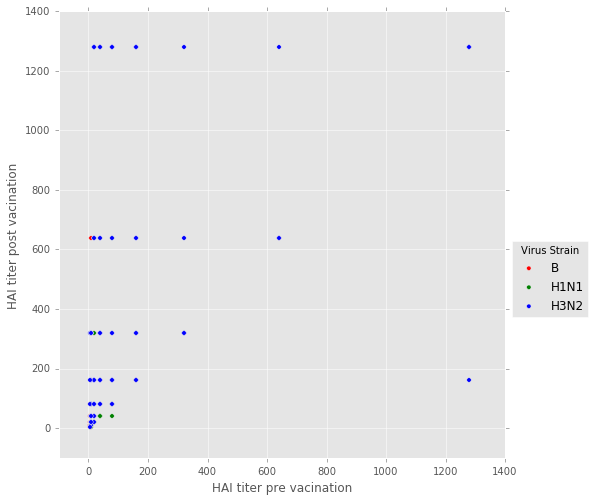

In [39]:
fig, (ax) = plt.subplots(1,1,figsize=(8, 8))
ax.scatter(B_strain['Day0'],B_strain['Day28'],label="B",c="red")
ax.scatter(H1N1_strain['Day0'],H1N1_strain['Day28'],label="H1N1",c="green")
ax.scatter(H3N2_strain['Day0'],H3N2_strain['Day28'],label="H3N2",c="blue")
ax.set_xlabel('HAI titer pre vacination')
ax.set_ylabel('HAI titer post vacination')
ax.set_xlim(left=-100)
ax.set_ylim(bottom=-100)
ax.legend(bbox_to_anchor=(1.2, .5),scatterpoints=1,title="Virus Strain")
plt.show()

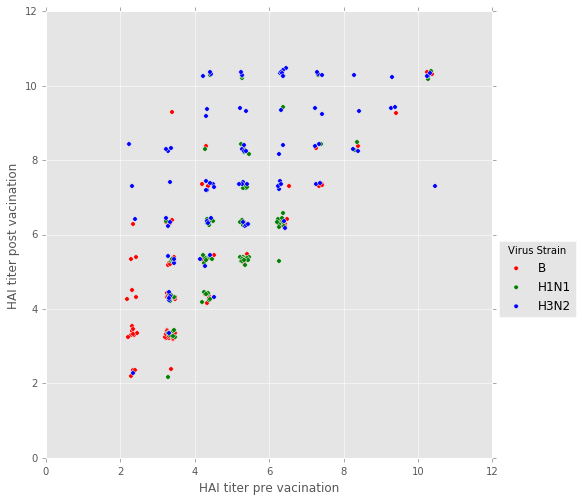

In [40]:
fig, (ax) = plt.subplots(1,1,figsize=(8, 8))
ax.scatter(rand_jitter_log(np.log2(B_strain['Day0'])),rand_jitter_log(np.log2(B_strain['Day28'])),label="B",c="red")
ax.scatter(rand_jitter_log(np.log2(H1N1_strain['Day0'])),rand_jitter_log(np.log2(H1N1_strain['Day28'])),label="H1N1",c="green")
ax.scatter(rand_jitter_log(np.log2(H3N2_strain['Day0'])),rand_jitter_log(np.log2(H3N2_strain['Day28'])),label="H3N2",c="blue")
ax.set_xlabel('HAI titer pre vacination')
ax.set_ylabel('HAI titer post vacination')
ax.legend(bbox_to_anchor=(1.2, .5),scatterpoints=1,title="Virus Strain")
plt.show()

##Plot of post (Day 28) vs. pre (Day 0) by Virus Strain

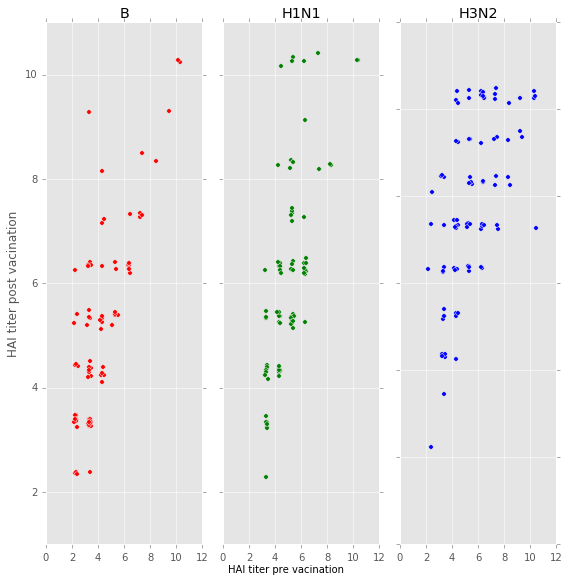

In [41]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(8, 8),sharex=True)
ax1.scatter(rand_jitter_log(np.log2(B_strain['Day0'])),rand_jitter_log(np.log2(B_strain['Day28'])),label="B",c="red")
ax1.set_ylabel('HAI titer post vacination')
ax1.set_title("B")

ax2.scatter(rand_jitter_log(np.log2(H1N1_strain['Day0'])),rand_jitter_log(np.log2(H1N1_strain['Day28'])),label="H1N1",c="green")
ax2.set_yticklabels([])
ax2.set_title("H1N1")

ax3.scatter(rand_jitter_log(np.log2(H3N2_strain['Day0'])),rand_jitter_log(np.log2(H3N2_strain['Day28'])),label="H3N2",c="blue")
ax3.set_yticklabels([])
ax3.set_title("H3N2")
fig.text(0.5,0,'HAI titer pre vacination',ha='center')
plt.tight_layout()
plt.show()

##Plot of HAI response vs. pre (Day 0) vaccination HAI titer

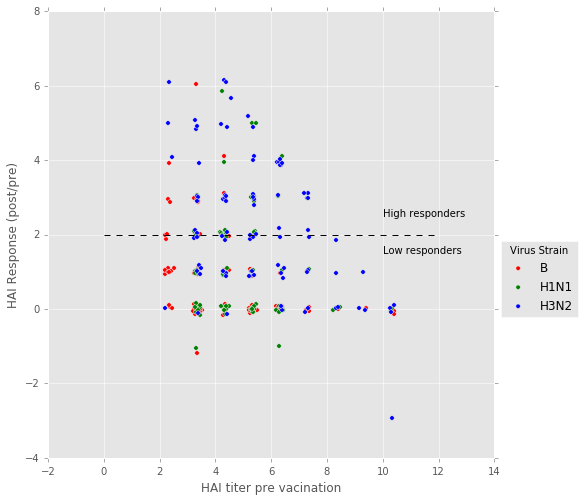

In [42]:
fig, (ax) = plt.subplots(1,1,figsize=(8, 8))
ax.scatter(rand_jitter_log(np.log2(B_strain['Day0'])),rand_jitter_log(B_strain['FOLD_CHANGE_LOG2']),label="B",c="red")
ax.scatter(rand_jitter_log(np.log2(H1N1_strain['Day0'])),rand_jitter_log(H1N1_strain['FOLD_CHANGE_LOG2']),label="H1N1",c="green")
ax.scatter(rand_jitter_log(np.log2(H3N2_strain['Day0'])),rand_jitter_log(H3N2_strain['FOLD_CHANGE_LOG2']),label="H3N2",c="blue")
ax.set_ylabel('HAI Response (post/pre)')
ax.set_xlabel('HAI titer pre vacination')
ax.hlines(2,0,12,linestyles='dashed')
ax.text(10,2.5,"High responders")
ax.text(10,1.5,"Low responders")

ax.legend(bbox_to_anchor=(1.2, .5),scatterpoints=1,title="Virus Strain")
plt.show()

#Examining if age of the subjects and the virus strain influence the influenza vaccine response
Plotting boxplots of the HAI responses separate by virus strain, we can see that the response varies by virus type.

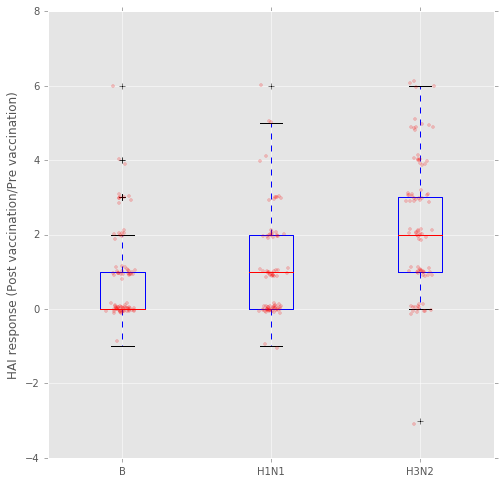

In [43]:
fig, (ax) = plt.subplots(1,1,figsize=(8, 8))
data = [B_strain['FOLD_CHANGE_LOG2'],H1N1_strain['FOLD_CHANGE_LOG2'],H3N2_strain['FOLD_CHANGE_LOG2']]
ax.boxplot(data)
ax.set_xticklabels(['B','H1N1','H3N2'])
strain = ['B','H1N1','H3N2']
for i in [1,2,3]:
    y = rand_jitter_log(hai_analysis.FOLD_CHANGE_LOG2[hai_analysis.VIRUS_STRAIN_REPORTED==strain[i-1]])
    x = np.random.normal(i,0.04,size=len(y))
    ax.plot(x,y,'r.',alpha=0.2)
    ax.set_ylabel("HAI response (Post vaccination/Pre vaccination)")
plt.show()

##Response varies by age group (arm)
Showing the response data per age group (arm) points tothe idea that the HAI response also varies by arm

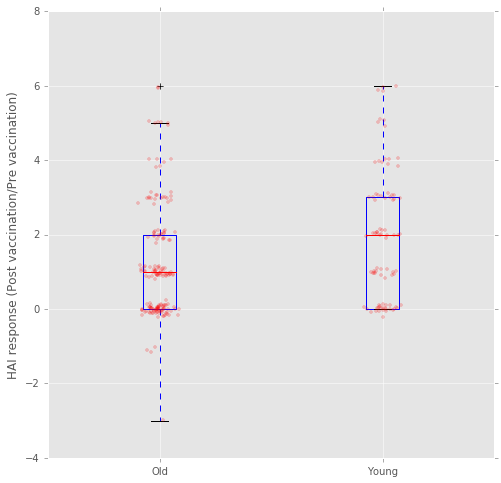

In [44]:
fig, (ax) = plt.subplots(1,1,figsize=(8, 8))
data = [hai_analysis.FOLD_CHANGE_LOG2[hai_analysis.ARM_NAME=="Old"],hai_analysis.FOLD_CHANGE_LOG2[hai_analysis.ARM_NAME=="Young"]]
ax.boxplot(data)
ax.set_xticklabels(['Old','Young'])
arm = ['Old','Young']
for i in [1,2]:
    y = rand_jitter_log(hai_analysis.FOLD_CHANGE_LOG2[hai_analysis.ARM_NAME==arm[i-1]])
    x = np.random.normal(i,0.04,size=len(y))
    ax.plot(x,y,'r.',alpha=0.2)
    ax.set_ylabel("HAI response (Post vaccination/Pre vaccination)")
plt.show()

##Response varies by 2 factors: Strain and Age
Next, we focussed on the combination of these two factors. Do the young people have a higher response for each of the
three virus strains ?

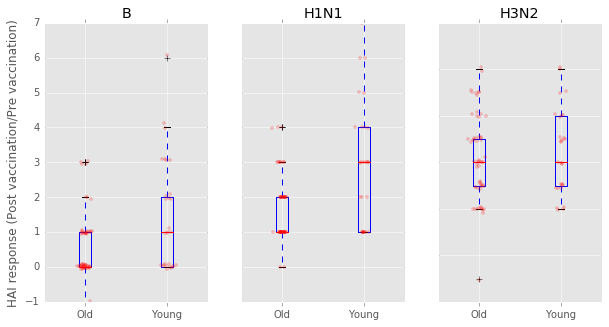

In [45]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10, 5))
data = [B_strain_old.FOLD_CHANGE_LOG2,B_strain_young.FOLD_CHANGE_LOG2]
ax1.boxplot(data)
ax1.set_xticklabels(['Old','Young'])
ax1.set_title("B")
ax1.tick_params(axis='y', direction='in',length=1)
arm = ['Old','Young']
for i in [1,2]:
    y = rand_jitter_log(B_strain.FOLD_CHANGE_LOG2[B_strain.ARM_NAME==arm[i-1]])
    x = np.random.normal(i,0.04,size=len(y))
    ax1.plot(x,y,'r.',alpha=0.2)
    ax1.set_ylabel("HAI response (Post vaccination/Pre vaccination)")
    
data = [H1N1_strain_old.FOLD_CHANGE_LOG2,H1N1_strain_young.FOLD_CHANGE_LOG2]
ax2.boxplot(data)
ax2.set_xticklabels(['Old','Young'])
ax2.set_title("H1N1")
ax2.set_yticklabels([])
ax2.tick_params(axis='y', direction='in',length=1)
arm = ['Old','Young']
for i in [1,2]:
    y = rand_jitter(H1N1_strain.FOLD_CHANGE_LOG2[H1N1_strain.ARM_NAME==arm[i-1]])
    x = np.random.normal(i,0.04,size=len(y))
    ax2.plot(x,y,'r.',alpha=0.2)
    
data = [H3N2_strain_old.FOLD_CHANGE_LOG2,H3N2_strain_young.FOLD_CHANGE_LOG2]
ax3.boxplot(data)
ax3.set_xticklabels(['Old','Young'])
ax3.set_title("H3N2")
ax3.set_yticklabels([])
ax3.tick_params(axis='y', direction='in',length=1)
arm = ['Old','Young']
for i in [1,2]:
    y = rand_jitter_log(H3N2_strain.FOLD_CHANGE_LOG2[H3N2_strain.ARM_NAME==arm[i-1]])
    x = np.random.normal(i,0.04,size=len(y))
    ax3.plot(x,y,'r.',alpha=0.2)
    
plt.show()

In this figure, we can see that it seems like that the response to the H3N2 strain is independent from the age group; while for the H1N1 and B strains, the young people respond on average stronger than the old ones. To test this, we run Wilcoxon rank sum tests.

# Run independent 2-group Mann-whitney U Test

The documentation for this test states: "This test corrects for ties and by default uses a continuity correction. The reported p-value is for a one-sided hypothesis, to get the two-sided p-value multiply the returned p-value by 2."

In [46]:
from scipy import stats
t1 = B_strain_young.FOLD_CHANGE_LOG2
t2 = B_strain_old.FOLD_CHANGE_LOG2

u_stat, p_val = stats.mannwhitneyu(t1, t2)

print p_val, u_stat, p_val * 2

0.0109153291517 628.0 0.0218306583033


In [47]:
t1 = H1N1_strain_young.FOLD_CHANGE_LOG2
t2 = H1N1_strain_old.FOLD_CHANGE_LOG2

u_stat, p_val = stats.mannwhitneyu(t1, t2)

print p_val, u_stat, p_val * 2

0.00157769523287 550.0 0.00315539046574


In [48]:
t1 = H3N2_strain_young.FOLD_CHANGE_LOG2
t2 = H3N2_strain_old.FOLD_CHANGE_LOG2

u_stat, p_val = stats.mannwhitneyu(t1, t2)

print p_val, u_stat, p_val * 2

0.311037225027 814.0 0.622074450053


The results of this statistical tests show that the HAI response is significantly different between the age groups at
a 0.05 level for the B and H1N1 strains, while not for the H3N2 strain